# Content
* [Step 1 Project Description]
* [Step 2 Import Module]
* [Step 3 Import Datasets]
* [Step 4 Improving The Dataset]
    * [Step 4.1 Change The Data Type]
    * [Step 4.2 Handling The Missing Value]
    * [Step 4.3 Calculate The Gold Recovery]
    * [Step 4.4 The Missing Features From The Test Set]
* [Step 5 Data Analysis]
    * [Step 5.1 The Concentration of Au (gold), Ag (silver), and Pb (lead)]
    * [Step 5.2 Compare The Distribution of The Training and Test Feeds]
    * [Step 5.3 Total Konsentrasi di Tahapan Berbeda]
    * [Step 5.4 Remove Outliers]
    * [Step 5.4 Merging Data]
* [Step 6 Model Development]
    * [Step 6.1 Create The sMAPE (Symmetric Mean Absolute Percentage Error) Function]
    * [Step 6.2 Train The Linear Regression Model]
    * [Step 6.3 Train The Decision Tree Regressor Model]
    * [Step 6.4 Train The Random Forest Model]
    * [Step 6.5 Apply The Model to The Test Set]
* [Step 7 Conclusion]

# Project Description

Data is indexed by the date and time of acquisition (the date feature). Regarding time, parameters that are close together are generally similar. Some parameters are not available because their measurement and/or calculation are done long afterward. That's why some features present in the training set may not be in the test set. The test set also does not include the target variable. The source dataset includes both the training and test sets with all their features.

# Import  Module

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Import Datasets

In [2]:
try:
    train = pd.read_csv('D:\datasets\projek_10\gold_recovery_train.csv')
    test = pd.read_csv('D:\datasets\projek_10\gold_recovery_test.csv')
    full = pd.read_csv('D:\datasets\projek_10\gold_recovery_full.csv')
except:
    train = pd.read_csv('/datasets/gold_recovery_train.csv')
    test = pd.read_csv('/datasets/gold_recovery_test.csv')
    full = pd.read_csv('/datasets/gold_recovery_full.csv')

# Checking Datasets

In [3]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
test.info()
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [5]:
full.info()
full.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


**Information obtained:**
- In the training data, there are 87 columns and 16,860 rows. However, some columns have missing values.
- In the test data, there are 53 columns and 5,856 rows. However, some columns have missing values.
- In the full data, there are 87 columns and 22,716 rows. However, some columns have missing values.
- All data have one incorrect data type in the `date` column.
- Some unnecessary features will be removed.
- Our targets are `rougher.output.recovery` and `final.output.recovery`.

# Improving The Datasets

## Changing The Data Type

In [6]:
# Converting data type from object to datetime
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])
full['date'] = pd.to_datetime(full['date'])

In [7]:
# Checking data types
train.dtypes

date                                          datetime64[ns]
final.output.concentrate_ag                          float64
final.output.concentrate_pb                          float64
final.output.concentrate_sol                         float64
final.output.concentrate_au                          float64
                                                   ...      
secondary_cleaner.state.floatbank5_a_level           float64
secondary_cleaner.state.floatbank5_b_air             float64
secondary_cleaner.state.floatbank5_b_level           float64
secondary_cleaner.state.floatbank6_a_air             float64
secondary_cleaner.state.floatbank6_a_level           float64
Length: 87, dtype: object

In [8]:
# Checking data types
test.dtypes

date                                          datetime64[ns]
primary_cleaner.input.sulfate                        float64
primary_cleaner.input.depressant                     float64
primary_cleaner.input.feed_size                      float64
primary_cleaner.input.xanthate                       float64
primary_cleaner.state.floatbank8_a_air               float64
primary_cleaner.state.floatbank8_a_level             float64
primary_cleaner.state.floatbank8_b_air               float64
primary_cleaner.state.floatbank8_b_level             float64
primary_cleaner.state.floatbank8_c_air               float64
primary_cleaner.state.floatbank8_c_level             float64
primary_cleaner.state.floatbank8_d_air               float64
primary_cleaner.state.floatbank8_d_level             float64
rougher.input.feed_ag                                float64
rougher.input.feed_pb                                float64
rougher.input.feed_rate                              float64
rougher.input.feed_size 

In [9]:
# Checking data types
full.dtypes

date                                          datetime64[ns]
final.output.concentrate_ag                          float64
final.output.concentrate_pb                          float64
final.output.concentrate_sol                         float64
final.output.concentrate_au                          float64
                                                   ...      
secondary_cleaner.state.floatbank5_a_level           float64
secondary_cleaner.state.floatbank5_b_air             float64
secondary_cleaner.state.floatbank5_b_level           float64
secondary_cleaner.state.floatbank6_a_air             float64
secondary_cleaner.state.floatbank6_a_level           float64
Length: 87, dtype: object

## Handling The Missing Value

In [10]:
# Checking the percentage of missing data
train.isna().sum()/len(train)*100

date                                          0.000000
final.output.concentrate_ag                   0.427046
final.output.concentrate_pb                   0.427046
final.output.concentrate_sol                  2.194543
final.output.concentrate_au                   0.421115
                                                ...   
secondary_cleaner.state.floatbank5_a_level    0.504152
secondary_cleaner.state.floatbank5_b_air      0.504152
secondary_cleaner.state.floatbank5_b_level    0.498221
secondary_cleaner.state.floatbank6_a_air      0.610913
secondary_cleaner.state.floatbank6_a_level    0.504152
Length: 87, dtype: float64

In [11]:
# Checking the percentage of missing data
test.isna().sum()/len(test)*100

date                                          0.000000
primary_cleaner.input.sulfate                 5.157104
primary_cleaner.input.depressant              4.849727
primary_cleaner.input.feed_size               0.000000
primary_cleaner.input.xanthate                2.834699
primary_cleaner.state.floatbank8_a_air        0.273224
primary_cleaner.state.floatbank8_a_level      0.273224
primary_cleaner.state.floatbank8_b_air        0.273224
primary_cleaner.state.floatbank8_b_level      0.273224
primary_cleaner.state.floatbank8_c_air        0.273224
primary_cleaner.state.floatbank8_c_level      0.273224
primary_cleaner.state.floatbank8_d_air        0.273224
primary_cleaner.state.floatbank8_d_level      0.273224
rougher.input.feed_ag                         0.273224
rougher.input.feed_pb                         0.273224
rougher.input.feed_rate                       0.683060
rougher.input.feed_size                       0.375683
rougher.input.feed_sol                        1.144126
rougher.in

In [12]:
# Checking the percentage of missing data
full.isna().sum()/len(full) * 100

date                                          0.000000
final.output.concentrate_ag                   0.391794
final.output.concentrate_pb                   0.382990
final.output.concentrate_sol                  1.694841
final.output.concentrate_au                   0.378588
                                                ...   
secondary_cleaner.state.floatbank5_a_level    0.444621
secondary_cleaner.state.floatbank5_b_air      0.444621
secondary_cleaner.state.floatbank5_b_level    0.440218
secondary_cleaner.state.floatbank6_a_air      0.523860
secondary_cleaner.state.floatbank6_a_level    0.444621
Length: 87, dtype: float64

Most of the missing data is below **5%**. So, it's okay to drop the missing value.

In [13]:
# Removing The Missing Value
train = train.dropna()
test = test.dropna()
full = full.dropna()

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11017 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                11017 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         11017 non-null  float64       
 2   final.output.concentrate_pb                         11017 non-null  float64       
 3   final.output.concentrate_sol                        11017 non-null  float64       
 4   final.output.concentrate_au                         11017 non-null  float64       
 5   final.output.recovery                               11017 non-null  float64       
 6   final.output.tail_ag                                11017 non-null  float64       
 7   final.output.tail_pb                                11017 non-null  float64       
 8   final.

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5383 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5383 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5383 non-null   float64       
 2   primary_cleaner.input.depressant            5383 non-null   float64       
 3   primary_cleaner.input.feed_size             5383 non-null   float64       
 4   primary_cleaner.input.xanthate              5383 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5383 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5383 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5383 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5383 non-null   float64       
 9   primary_

In [16]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16094 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                16094 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         16094 non-null  float64       
 2   final.output.concentrate_pb                         16094 non-null  float64       
 3   final.output.concentrate_sol                        16094 non-null  float64       
 4   final.output.concentrate_au                         16094 non-null  float64       
 5   final.output.recovery                               16094 non-null  float64       
 6   final.output.tail_ag                                16094 non-null  float64       
 7   final.output.tail_pb                                16094 non-null  float64       
 8   final.

## Calculate The Gold Recovery

In [17]:
'''To calculate the gold recovery, we need 3 variables:
- C: Represents the concentrate right after the flotation process, which corresponds to concentrate_au.
- F: Represents the percentage of gold in the feed before the flotation process, corresponding to feed_au.
- T: Represents the percentage of gold in the rougher tails, corresponding to tail_au.
'''

# Function to calculate gold recovery
def calculate_recovery(c, f, t):
    formula = ((c*(f-t))/(f*(c-t))) * 100
    return formula

recovery = train['rougher.output.recovery']
concentrate = train['rougher.output.concentrate_au']
feed = train['rougher.input.feed_au']
tail = train['rougher.output.tail_au']

# Application of the function to calculate gold recovery
calculated = calculate_recovery(concentrate, feed, tail)
print(calculated.head())

# Calculating the value
mae = mean_absolute_error(recovery, calculated)
print('Perolehan skor MAE:', mae)

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
dtype: float64
Perolehan skor MAE: 9.460144184559453e-15


**From the Information Above:** The values of the gold recovery calculations and the original calculations are correct. This is evident from the MAE metric, which is close to 0.

## Features That Are Missing From The Test Set

In [18]:
# Finding features that are not present in the test set
df = pd.DataFrame()
list_columns = list(test.columns)
for col in list(train.columns):
    if col not in list_columns: # If features in the training set are not present in the test set
        df[col] = train[col] # Displaying features that are the same as the training set
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11017 entries, 0 to 16859
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         11017 non-null  float64
 1   final.output.concentrate_pb                         11017 non-null  float64
 2   final.output.concentrate_sol                        11017 non-null  float64
 3   final.output.concentrate_au                         11017 non-null  float64
 4   final.output.recovery                               11017 non-null  float64
 5   final.output.tail_ag                                11017 non-null  float64
 6   final.output.tail_pb                                11017 non-null  float64
 7   final.output.tail_sol                               11017 non-null  float64
 8   final.output.tail_au                                11017 non-null  float64


**Features that are missing in the test set:**
- There are 9 parameters in the final stage.
- There are 8 parameters in the primary cleaner stage.
- There are 13 parameters in the rougher stage.
- There are 4 parameters in the secondary cleaner stage.
- In total, there are 34 features missing in the test set.

In other words, we won't be using this data for further analysis in the next stages.

# Data Analysis

## The Concentration of Au (gold), Ag (silver), and Pb (lead).

In [19]:
'''To observe changes in the concentration of each metal, we can create histograms for each metal using the training data. 
The columns used will be the columns from each flotation stage.
'''

# List to create concentration plots
concentrate_au = ['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'secondary_cleaner.output.tail_au','final.output.concentrate_au']
concentrate_ag = ['rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'secondary_cleaner.output.tail_ag','final.output.concentrate_ag']
concentrate_pb = ['rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'secondary_cleaner.output.tail_pb','final.output.concentrate_pb']

# Creating a function to plot each concentration change that occurs
def plot_concentrate(data, list_stage):
    for stage in list_stage:
        data[stage].plot(kind='hist', legend=True, alpha=0.4)
        plt.xlabel('concentration')

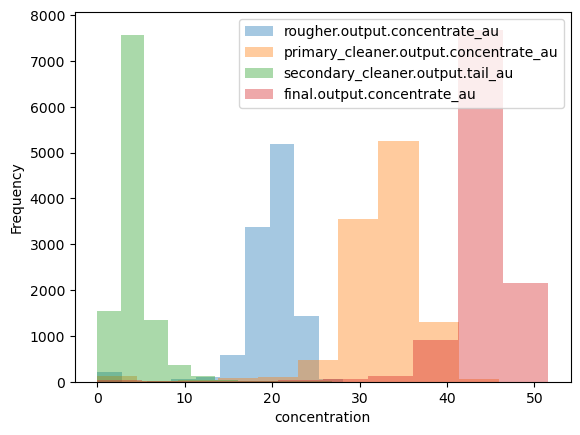

In [20]:
plot_concentrate(train, concentrate_au)

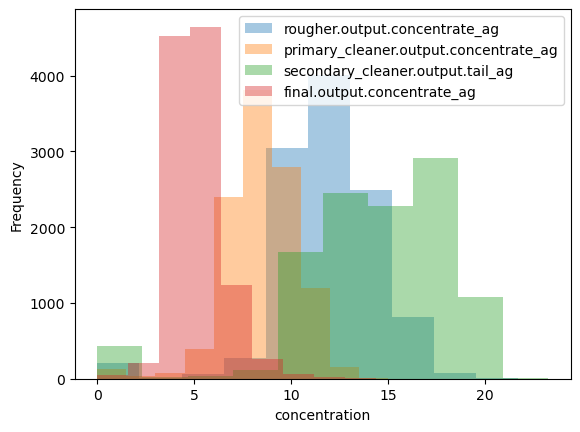

In [21]:
plot_concentrate(train, concentrate_ag)

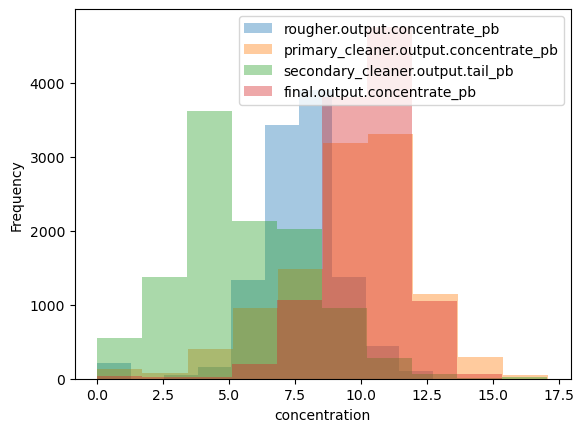

In [22]:
plot_concentrate(train, concentrate_pb)

**From the information above:**
- For the concentration of the Au metal, there is an increase from the initial purification stage to the final concentrate, which has a high concentration level.
- For the concentration of the Ag metal, there is no significant increase, and the final concentrate contains many low concentrations. There isn't much change in the concentration of this metal.
- For the concentration of the Pb metal, there is no significant increase, and the concentration level is very low. However, there is an increase in the flotation stage compared to the Ag metal.

In conclusion, for now, Au has the highest concentration level compared to Pb and Ag.

## Comparing the Distribution of Training and Test Feeds

Text(0.5, 0, 'Feed Size')

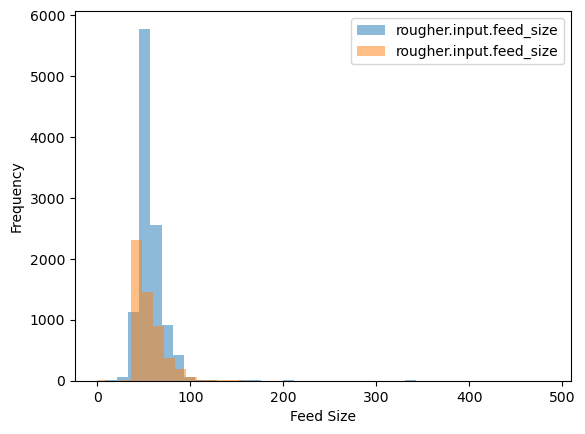

In [23]:
# Creating plot histogram
train['rougher.input.feed_size'].plot(kind='hist', legend=True, alpha=0.5, bins=40)
test['rougher.input.feed_size'].plot(kind='hist', legend=True, alpha=0.5, bins=40)
plt.xlabel('Feed Size')

In [24]:
train['rougher.input.feed_size'].describe()

count    11017.000000
mean        57.215128
std         18.913146
min          9.659576
25%         48.397242
50%         53.843359
75%         61.461770
max        484.967466
Name: rougher.input.feed_size, dtype: float64

In [25]:
test['rougher.input.feed_size'].describe()

count    5383.000000
mean       56.338644
std        21.836788
min         0.046369
25%        43.913766
50%        50.924232
75%        62.364984
max       477.445473
Name: rougher.input.feed_size, dtype: float64

**Based on the Above Information:** The distribution of feed particle sizes in the training set and test set does not appear to differ significantly. Although the frequencies differ substantially due to the differing data sizes between the two datasets.

## Total Concentrations at Different Stages

In [26]:
# Feed Stage
input_feed = ['rougher.input.feed_au', 'rougher.input.feed_pb', 'rougher.input.feed_ag', 'rougher.input.feed_sol']

# Rougher Stage
output_rougher = ['rougher.output.concentrate_au', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_sol']

# Final Stage
final_output = ['final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol']

In [27]:
# Summing all concentration values for different substances and stages
full['total_input_feed'] = full[input_feed].sum(axis=1).reset_index(drop=True)
full['total_output_rougher'] = full[output_rougher].sum(axis=1).reset_index(drop=True)
full['total_final_output'] = full[final_output].sum(axis=1).reset_index(drop=True)

<AxesSubplot:>

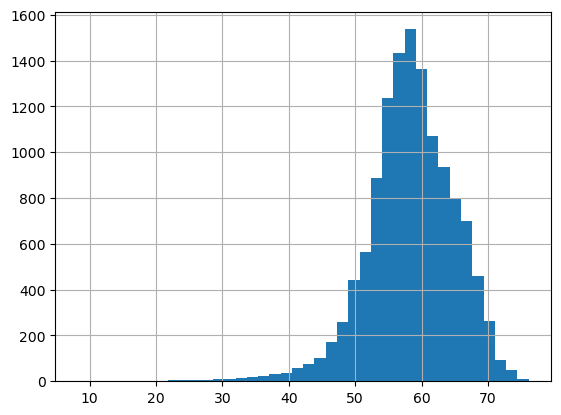

In [28]:
full['total_input_feed'].hist(bins=40, label='Input Concentrate')

<AxesSubplot:>

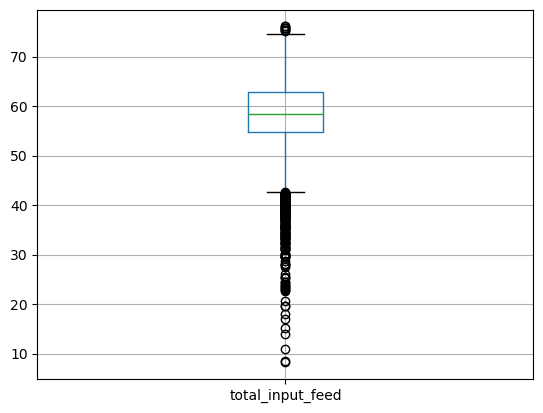

In [29]:
full.boxplot(column='total_input_feed')

<AxesSubplot:>

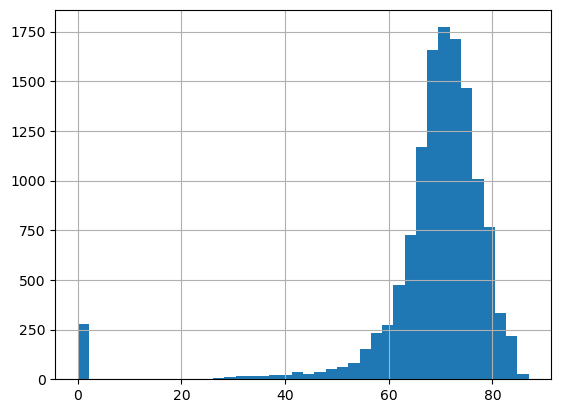

In [30]:
full['total_output_rougher'].hist(bins=40, label='Output Concentrate')

<AxesSubplot:>

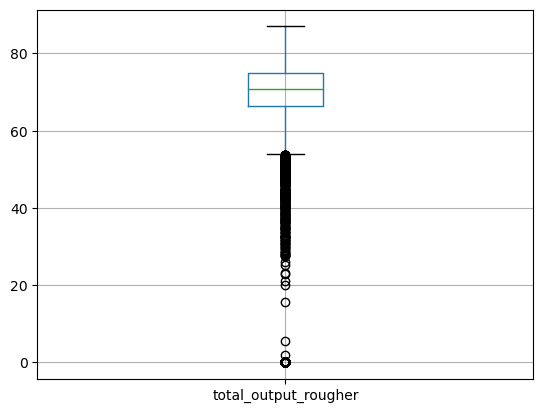

In [31]:
full.boxplot(column='total_output_rougher')

<AxesSubplot:>

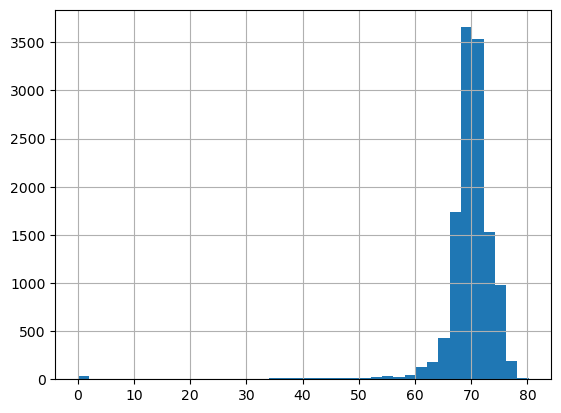

In [32]:
full['total_final_output'].hist(bins=40, label='Final Concentrate')

<AxesSubplot:>

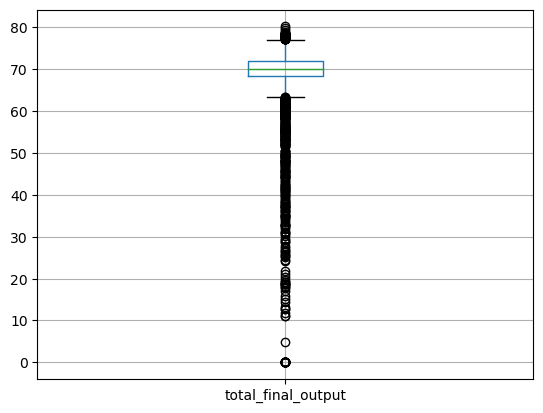

In [33]:
full.boxplot(column='total_final_output')

If you look at the histogram, it is evident that the summed values have a considerable number of outliers. The data in the histogram also shows a right-skewed distribution. This can significantly impact the analysis and model-building process. Therefore, we will remove the outliers from the training data.

## Removing Outlier

### Data Feed

In [34]:
# Calculating Q1, Q2, and IQR
Q1_feed = full['total_input_feed'].quantile(0.25)
Q3_feed = full['total_input_feed'].quantile(0.75)
IQR_feed = Q3_feed-Q1_feed

In [35]:
# Determining the upper and lower bounds
upper_bound_feed = Q3_feed+(1.5*IQR_feed)
lower_bound_feed = Q1_feed-(1.5*IQR_feed)

74.88299766799092

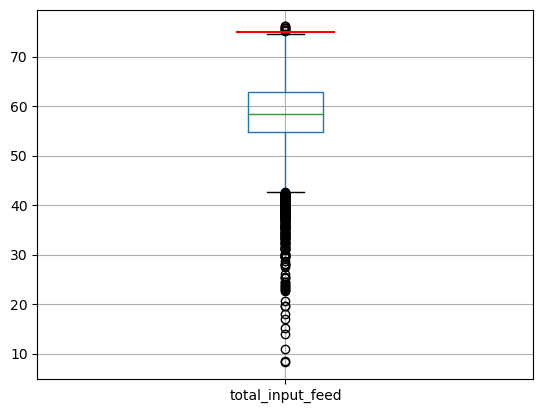

In [36]:
# The boxplot is created by specifying the upper and lower bounds
full.boxplot(column='total_input_feed')
plt.hlines(y=upper_bound_feed, xmin=0.9, xmax=1.1, color='red')
upper_bound_feed

42.575928501312646

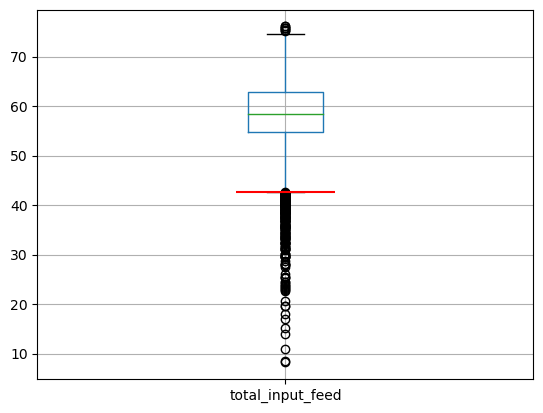

In [37]:
full.boxplot(column='total_input_feed')
plt.hlines(y=lower_bound_feed, xmin=0.9, xmax=1.1, color='red')
lower_bound_feed

### Data Output 

In [38]:
# Calculating Q1, Q2, and IQR
Q1_output = full['total_output_rougher'].quantile(0.25)
Q3_output = full['total_output_rougher'].quantile(0.75)
IQR_output = Q3_output-Q1_output

In [39]:
# Determining the upper and lower bounds
upper_bound_output = Q3_output+(1.5*IQR_output)
lower_bound_output = Q1_output-(1.5*IQR_output)

87.51640117856937

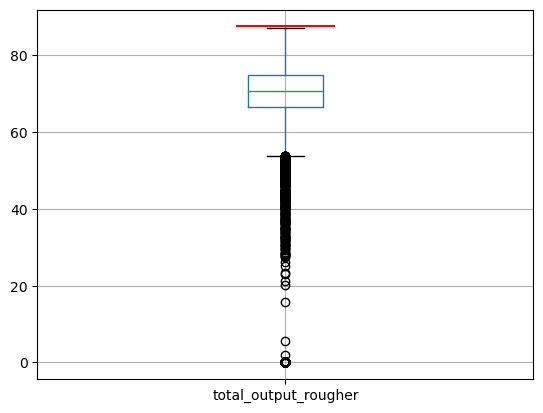

In [40]:
# boxplot dengan memunculkan batas atas dan batas bawah
full.boxplot(column='total_output_rougher')
plt.hlines(y=upper_bound_output, xmin=0.9, xmax=1.1, color='red')
upper_bound_output

53.81409291459028

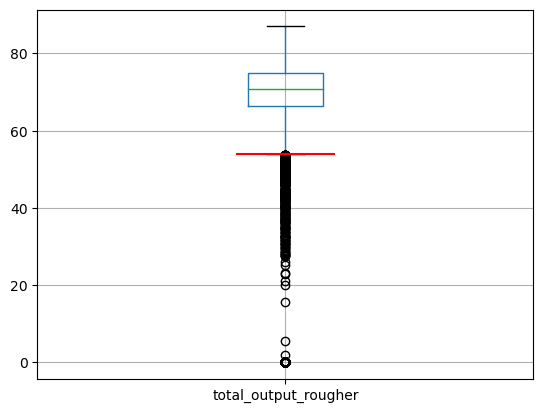

In [41]:
full.boxplot(column='total_output_rougher')
plt.hlines(y=lower_bound_output, xmin=0.9, xmax=1.1, color='red')
lower_bound_output

### Data Final

In [42]:
# Calculatinf Q1, Q2, and IQR
Q1_final = full['total_final_output'].quantile(0.25)
Q3_final = full['total_final_output'].quantile(0.75)
IQR_final = Q3_final-Q1_final

In [43]:
# Menentukan batas atas dan batas bawah
upper_bound_final = Q3_final+(1.5*IQR_final)
lower_bound_final = Q1_final-(1.5*IQR_final)

77.0477645580381

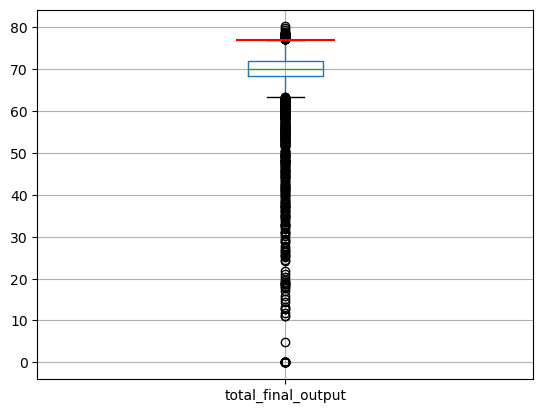

In [44]:
# boxplot dengan memunculkan batas atas dan batas bawah
full.boxplot(column='total_final_output')
plt.hlines(y=upper_bound_final, xmin=0.9, xmax=1.1, color='red')
upper_bound_final

63.275708947684315

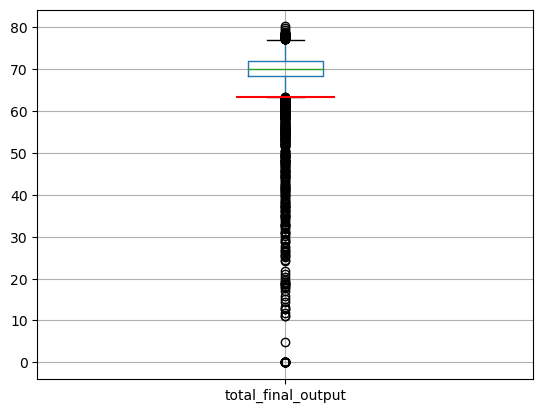

In [45]:
full.boxplot(column='total_final_output')
plt.hlines(y=lower_bound_final, xmin=0.9, xmax=1.1, color='red')
lower_bound_final

**Based on the information above:**
- The feed data has an upper bound of **73.56** and a lower bound of approximately **41.11**.
- The output data has an upper bound of **86.59** and a lower bound of approximately **52.79**.
- The final data has an upper bound of **76.41** and a lower bound of approximately **62.81**.

The data will be filtered to exclude the outlier values.

In [46]:
# Filtering the data based on the lower and upper bounds
full_without_outlier = full.query('42.57< total_input_feed <74.88')
full_without_outlier = full_without_outlier.query('53.81< total_output_rougher <87.51')
full_without_outlier = full_without_outlier.query('63.27< total_final_output <77.04')
full_without_outlier.shape

(11409, 90)

<AxesSubplot:>

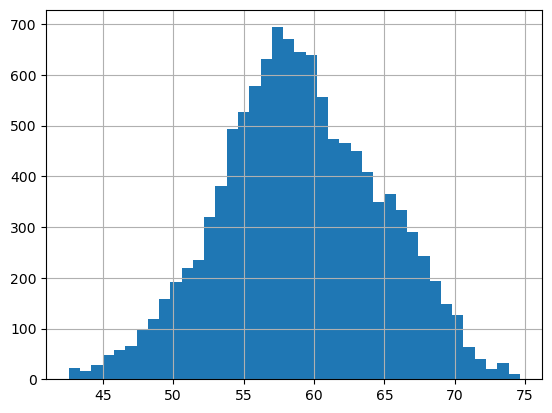

In [47]:
full_without_outlier['total_input_feed'].hist(bins=40)

<AxesSubplot:>

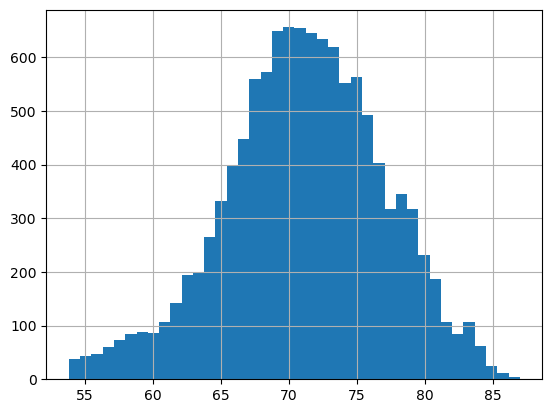

In [48]:
full_without_outlier['total_output_rougher'].hist(bins=40)

<AxesSubplot:>

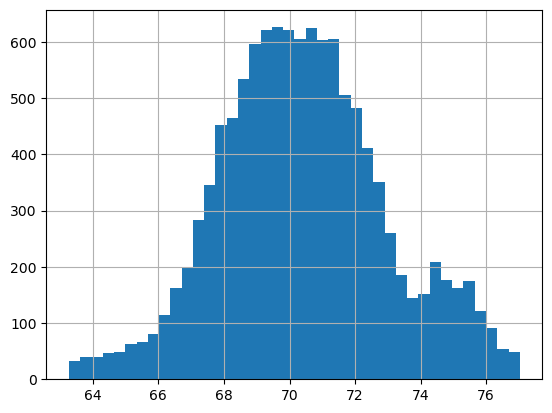

In [49]:
full_without_outlier['total_final_output'].hist(bins=40)

The data is now free from outliers. What remains is to fill in the missing data in the `test set`.

## Merging The Data

In [50]:
# Removing outlier in train set
total_data = full_without_outlier[['date', 'total_output_rougher']]
train_model = train.merge(total_data, how='left', on='date')

train_model = train_model[train_model['total_output_rougher'].notnull()]
train_model = train_model.drop(['total_output_rougher'], axis=1)
print("Data size:", train_model.shape)

Data size: (7595, 87)


In [51]:
# Defining the target and features in the training set
train_targets = train_model[['rougher.output.recovery', 'final.output.recovery']]
print("Target size:", train_targets.shape)

'''Since the columns in the test set are not the same as those in the training set, 
the columns in the training set will be aligned with the test set.
'''
train_features = train_model.loc[:, list(test.columns)].drop(['date'], axis=1)
print("Features size:", train_features.shape)

Target size: (7595, 2)
Features size: (7595, 52)


Because there is no target column in the test set, which are `rougher.output.recovery` and `final.output.recovery`. So, we take the values of those columns from the full data. Not only that, to remove outliers in the test set, we will also take the `concentrate` column. So, there are a total of 10 columns.

In [52]:
# Removing outliers in test set
data_set = ['date', 'rougher.output.recovery', 'final.output.recovery', 'rougher.output.concentrate_au', 
          'rougher.output.concentrate_pb', 'rougher.output.concentrate_ag', 
          'rougher.output.concentrate_sol', 'final.output.concentrate_au', 
          'final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol']
data_sub_full = full.loc[:, list(data_set)]
data_sub_full.head()

,date,rougher.output.recovery,final.output.recovery,rougher.output.concentrate_au,rougher.output.concentrate_pb,rougher.output.concentrate_ag,rougher.output.concentrate_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol
0,2016-01-15 00:00:00,87.107763,70.541216,19.793808,7.101074,11.500771,28.029297,42.192020,6.055403,9.889648,5.507324
1,2016-01-15 01:00:00,86.843261,69.266198,20.050975,7.278807,11.615865,28.067063,42.701629,6.029369,9.968944,5.257781
2,2016-01-15 02:00:00,86.842308,68.116445,19.737170,7.216833,11.695753,27.454037,42.657501,6.055926,10.213995,5.383759
3,2016-01-15 03:00:00,87.226430,68.347543,19.320810,7.175616,11.915047,27.341277,42.689819,6.047977,9.977019,4.858634
4,2016-01-15 04:00:00,86.688794,66.927016,19.216101,7.240205,12.411054,27.041023,42.774141,6.148599,10.142511,4.939416


In [53]:
# Merging test set with data full
new_test = test.merge(data_sub_full, on='date')
new_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,rougher.output.recovery,final.output.recovery,rougher.output.concentrate_au,rougher.output.concentrate_pb,rougher.output.concentrate_ag,rougher.output.concentrate_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,89.993421,70.273583,22.186207,8.227045,15.734654,33.791932,40.743891,7.578381,10.466295,11.990938
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,88.089657,68.910432,22.638279,8.309476,15.966410,34.204715,39.604292,7.813838,10.581152,12.216172
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,88.412756,68.143213,21.788301,7.816041,15.885583,33.777118,40.724190,7.623392,10.424024,12.313710
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,87.360133,67.776393,23.222572,7.796154,15.541272,34.775256,39.290997,8.552457,10.503229,13.074570
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,83.236367,61.467078,23.741428,7.769400,14.758769,34.633033,40.254524,8.078781,10.222788,12.475427


In [54]:
# Removing outlier in test set
total = full_without_outlier[['date', 'total_output_rougher']]
test_model = new_test.merge(total_data, how='left', on='date')

test_model = test_model[test_model['total_output_rougher'].notnull()]
test_model = test_model.drop(['total_output_rougher'], axis=1)
print("Data size:", test_model.shape)

Data size: (3814, 63)


In [55]:
# Determined target and features in test set
test_targets = test_model[['rougher.output.recovery', 'final.output.recovery']]
print("Target size:", test_targets.shape)

'''Because the columns in the test set are not the same as those in the training set, 
the columns in the training set will be aligned with those in the test set.
'''
test_features = test_model.loc[:, list(test.columns)].drop(['date'], axis=1)
print("Target size:", test_features.shape)

Target size: (3814, 2)
Target size: (3814, 52)


In [56]:
# Implementation of Standard Scaler
scaler = StandardScaler()

all_features = list(train_features.columns)
scaler.fit(train_features[all_features])

train_features[all_features] = scaler.transform(train_features[all_features])
test_features[all_features] = scaler.transform(test_features[all_features])
train_features.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,-0.254536,0.282972,-0.381642,0.510268,-0.299720,-0.242329,-0.299403,-0.777241,-0.275836,-0.212091,...,-0.772676,-0.570880,-0.369041,-0.970198,-0.987461,-0.483945,-0.692742,-0.504134,-1.356499,-2.386653
1,-0.297388,0.333169,-0.381642,0.551573,-0.115044,-0.304573,-0.129145,-0.266591,-0.097135,-0.231473,...,-0.777596,-0.623262,-0.395463,-0.916451,-0.969243,-0.527106,-0.707713,-0.506545,-1.385373,-2.236432
2,-0.350395,0.638029,-0.381642,0.517714,0.062623,-0.276238,0.040555,-0.289498,0.080807,-0.277946,...,-0.773041,-0.571452,-0.402139,-0.913305,-0.964164,-0.526158,-0.703119,-0.505145,-1.379653,-2.277126
3,-0.395791,0.639780,-0.381642,0.533973,0.051515,-0.306035,0.042447,-0.260761,0.069181,-0.273700,...,-0.768734,-0.542552,-0.386794,-0.914262,-0.980288,-0.504633,-0.708885,-0.499471,-1.384015,-2.241616
4,-0.521233,0.816556,-0.381642,0.572980,0.061109,-0.244306,0.047855,-0.280713,0.064240,-0.278486,...,-0.770580,-0.524855,-0.395014,-0.912042,-0.987449,-0.562306,-0.721991,-0.501642,-1.385695,-2.278846


The data has been cleansed of outliers and separated into both the target and its features. This way, the data is ready for application in a model.

# Model Development

## Creating the sMAPE Function

In [57]:
# sMAPE Function
def smape_calculation(target, predictions):
    smape_rougher = (np.mean((np.abs(target.iloc[:,0] - predictions[:,0])/\
                             ((np.abs(target.iloc[:,0]) + np.abs(predictions[:,0])) / 2))) * 100)
    smape_final = (np.mean((np.abs(target.iloc[:,1] - predictions[:,1])/\
                             ((np.abs(target.iloc[:,1]) + np.abs(predictions[:,1])) / 2))) * 100)
    sMAPE = 0.25 * smape_rougher + 0.75 * smape_final # rumus final sMAPE
    return sMAPE
sMAPE_score = make_scorer(smape_calculation) # membuat score dengan persen error

## Train The Linear Regression Model

In [58]:
LR = LinearRegression()
lr_score = cross_val_score(LR, train_features, train_targets, scoring=sMAPE_score,cv=5)
print(lr_score)
print("Rata-rata score yang diperoleh dari model:", lr_score.mean())

[11.83667808  9.92743648  9.22576411 13.61946762 19.48758429]
Rata-rata score yang diperoleh dari model: 12.819386115777935


## Train The Decision Tree Regressor Model

In [59]:
STATE= 12345
for depth in range(1, 10):
    DST = DecisionTreeRegressor(random_state=STATE, max_depth=depth)
    dst_score = cross_val_score(DST, train_features, train_targets, scoring=sMAPE_score,cv=5)
    print("Depth:", depth, "Rata-rata Score:", dst_score.mean())

Depth: 1 Rata-rata Score: 10.086161276542786
Depth: 2 Rata-rata Score: 9.220560020826044
Depth: 3 Rata-rata Score: 9.223653822461973
Depth: 4 Rata-rata Score: 9.291460591093811
Depth: 5 Rata-rata Score: 9.591734731643884
Depth: 6 Rata-rata Score: 9.825067967401571
Depth: 7 Rata-rata Score: 11.628634869119196
Depth: 8 Rata-rata Score: 11.676297749867732
Depth: 9 Rata-rata Score: 12.190722717825249


## Train The Random Forest Model

In [60]:
for depth in range(1, 10):
    RFT = RandomForestRegressor(n_estimators=20, max_depth=depth,random_state=STATE)
    rft_score = cross_val_score(RFT, train_features, train_targets, scoring=sMAPE_score,cv=5)
    print("Depth:", depth, "Rata-rata score:", rft_score.mean())

Depth: 1 Rata-rata score: 10.058461938307396
Depth: 2 Rata-rata score: 9.20311957620156
Depth: 3 Rata-rata score: 9.047974122318456
Depth: 4 Rata-rata score: 9.010630706147847
Depth: 5 Rata-rata score: 9.119986064954222
Depth: 6 Rata-rata score: 9.503370050385659
Depth: 7 Rata-rata score: 9.553845368904506
Depth: 8 Rata-rata score: 9.701977943961884
Depth: 9 Rata-rata score: 9.963663796152764


**From the information above, it can be concluded:** The best model is the random forest regression model with 20 estimators and a depth of 4, as it has the value closest to 0.

## Apply The Model to The Test Set

In [61]:
model = RandomForestRegressor(n_estimators=20, max_depth=4, random_state=STATE)
model.fit(train_features, train_targets)
predictions = model.predict(test_features)
print("The sMAPE result on the test set is:", smape_calculation(test_targets, predictions))

The sMAPE result on the test set is: 8.928113927005525


# Conclusion

Data Analysis:
- Based on the data analysis, the yield of Au has increased as seen from the final output.
- For Ag, the purification results indicate a low yield.
- For Pb, the purification results are very low when compared to both Au and Ag substances.
- The data shows a significant number of outliers when calculating the total rougher, final, and input.

Model Development:
- Based on the sMAPE values and the use of cross-validation, the lowest value is shown in the Random Forest model with 20 estimators and a depth of 4.
- When tested on the test set, the Random Forest model obtained an sMAPE of **8.92**.